In [43]:
import pandas as pd
import ISLP

data_path=""

Auto=pd.read_csv(data_path+'Auto.csv', na_values=['?'])
Auto['horsepower']=Auto['horsepower'].astype('float')
Auto.dropna(inplace=True)
Auto.head()

ModuleNotFoundError: No module named 'ISLP'

In [32]:
import numpy as np
# Y is a response variable
Y = mpg = Auto['mpg']



# Antag att regressionen av "horsepower" på "mpg" är ungefär linjär,
# Y = β0+ β1X
# mpg = β0 + β1 * 'horsepower'
# Modellspecifikationsmatrisen (designmatrisen) behöver en 1:a i första kolumnen

X = horsepower = np.column_stack([np.ones(Y.shape[0]), Auto['horsepower']])
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

In [33]:
# pseudo-invers för prestanda
# @ = matrismultiplikation

b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b


array([39.93586102, -0.15784473])

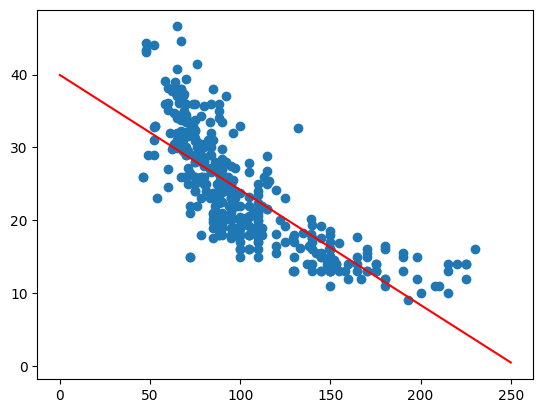

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], Y)
x = np.linspace(0,250)

y_hat=b[0]+ b[1]*x 
plt.plot(x,y_hat, c="red");


In [38]:
# RSS Residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak!

n = Y.shape[0]  # stickprovets storlek
v = X.shape[1] - 1  # antalet parametrar, bara horsepower i detta fall, så 1

SSE = np.sum(np.square(Y - (X @ b)))
SSE



np.float64(9385.915871932417)

$\texttt{Cov}(X,Y)= E[(x-\mu_X)(y-\mu_Y)]$

$S_{xy} \rightarrow (x-mu_X)(y-mu_Y)$

Om X och Y är oberoende så är Cov(X, Y)= 0 men vi kan inte anta det omvända. Dvs Cov=0 betyder inte nödvändigtvis att X och Y är oberoende, men de är åtminstone inte linjärt beroende.

En starkare egenskap är korrelation (Pearson coefficient of correlation), som är ett värde mellan -1 och 1 (inklusive ändpunkterna).

Låt $X$ och $Y$ vara slumpvariabler med medel $\mu_X$ resp. $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$. Korrelationen mellan $X$ och $Y$ ges då av:

\begin{equation*}
\rho_{XY}= \frac{\texttt{Cov(X,Y)}}{\sqrt{(Var X)(Var Y)}} 
\end{equation*}

Om pearsonkoefficienten är 1 eller -1 ($|\rho_{XY}|=1$), så har vi visat att det finns en ekvation:

$Y = \beta_0 + \beta_1X$

In [39]:
var=SSE/(n-v-1)
S = np.sqrt(var) # residual standard error, alltså en uppskattning av standrardfelet/stickprovsavvikelsen

SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)        # Sum of squares regression     - riktig, ej skattning

Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

se = var / n        # Standard error (of the mean)

# square of standard error of β1 = var/Sxx
se_b=var/Sxx

ci = (b[1], 2*np.sqrt(se_b))        # confidence interval
print(f"Confidence interval of predictor β1: {ci[0]:.4f} +- {ci[1]:.4f}")


Confidence interval of predictor β1: -0.1578 +- 0.0139


Detta är väldigt ungefärligt ett 90% interval (<2 sigma). Om vi kör regressionen många gånger på delmängder av datan (som ska ha samma medel, dvs vara balanserade), så väntar vi oss att 90% av värdena hamnar mellan 0,042 och 0,053

In [18]:
x_mean=np.mean(X[:,1])
se_intercept = var * (1/n * (np.square(x_mean)/(np.square(np.sum(X-x_mean)))))      #FEL!
se_intercept

# borde bli [6,130, 7,935]
b[0]

np.float64(7.032593549127828)

### Hypotestestning
Noll-hypotes:
$H_0$: There is no relationship between X and Y

Alternativ hypotes
$H_a$: There is a relationship between X and Y

$H_0$: $\beta_1 = 0$
$H_a$: $\beta_1 \neq 0$

T-statistika för att testa relevans

\begin{equation*}
t = \frac{\hat{\beta}_1 - \mathbb{0}}}etc


In [19]:
t = b[1]/se_b
t

np.float64(6303.106346188546)

OK, så regressionen är relevant, men hur bra är den?

$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}S_{{yy}}}}$

In [41]:
library(ISLR)

NameError: name 'library' is not defined